In [57]:
import pandas as pd
import numpy as np
#to plot the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
import os
os.chdir("/Users/tomxu/Documents/NASA-Jet-Engine-Maintenance/Data/CMaps/")

In [58]:
def prepare_data(drop_cols=True):
    dependent_var = ['RUL']
    index_columns_names =  ["UnitNumber", "Cycle"]
    operational_settings_columns_names = ["OpSet"+str(i) for i in range(1,4)]
    sensor_measure_columns_names =["SensorMeasure"+str(i) for i in range(1,22)]
    input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names
    cols_to_drop = ['OpSet3', 'SensorMeasure1', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure10',
                    'SensorMeasure14', 'SensorMeasure16', 'SensorMeasure18', 'SensorMeasure19']
    df_train = pd.read_csv('train_FD001.txt', delim_whitespace=True, names=input_file_column_names)
    rul = pd.DataFrame(df_train.groupby('UnitNumber')['Cycle'].max()).reset_index()
    rul.columns = ['UnitNumber', 'max']
    df_train = df_train.merge(rul, on=['UnitNumber'], how='left')
    df_train['RUL'] = df_train['max'] - df_train['Cycle']
    df_train.drop('max', axis=1, inplace=True)
    df_test = pd.read_csv('test_FD001.txt', delim_whitespace=True, names=input_file_column_names)    
    if(drop_cols == True):
        df_train = df_train.drop(cols_to_drop, axis=1)
        df_test = df_test.drop(cols_to_drop, axis=1)
    y_true = pd.read_csv('RUL_FD001.txt', delim_whitespace=True, names=["RUL"])
    y_true["UnitNumber"] = y_true.index    
    return df_train, df_test, y_true

In [59]:
df_train, df_test, y_true = prepare_data(drop_cols=True)
df_train.shape, df_test.shape, y_true.shape

((20631, 18), (13096, 17), (100, 2))

In [60]:
df_train

,UnitNumber,Cycle,OpSet1,OpSet2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [61]:
def get_label_group(rul):
    if rul <= 50:
        return 'Urgent'
    elif rul >= 51 and rul <= 125:
        return 'Short'
    elif rul >= 126 and rul <= 200:
        return 'Medium'
    else:
        return 'Long'

df_train['Label'] = df_train['RUL'].apply(get_label_group)
df_train

,UnitNumber,Cycle,OpSet1,OpSet2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL,Label
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191,Medium
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190,Medium
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189,Medium
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188,Medium
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4,Urgent
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3,Urgent
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2,Urgent
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1,Urgent


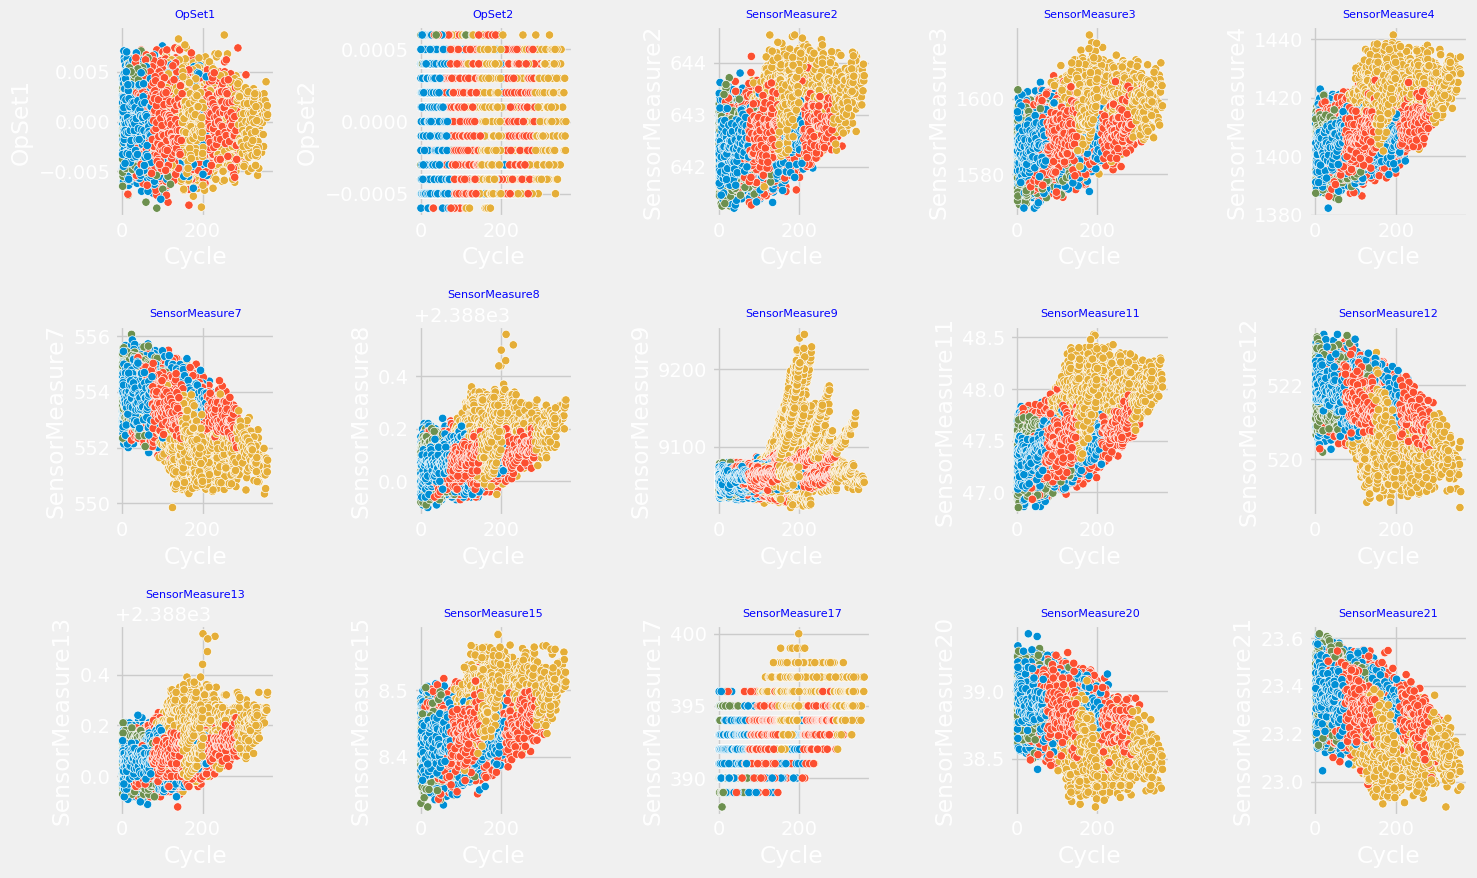

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 9))

for kk in range(1, 16):
    plt.subplot(3, 5, kk)
    sns.scatterplot(x='Cycle', y=df_train.iloc[:, 1 + kk], hue='Label', data=df_train)
    plt.title(df_train.columns[1 + kk], fontsize=8, color=[0, 0, 1])
    plt.legend().set_visible(False)

plt.tight_layout()
plt.show()

In [63]:
from sklearn.preprocessing import StandardScaler
feats = df_train.columns.drop(['UnitNumber', 'Cycle', 'RUL', "Label"])
std_scaler = StandardScaler()
df_train[feats] = std_scaler.fit_transform(df_train[feats])
df_test[feats] = std_scaler.transform(df_test[feats])

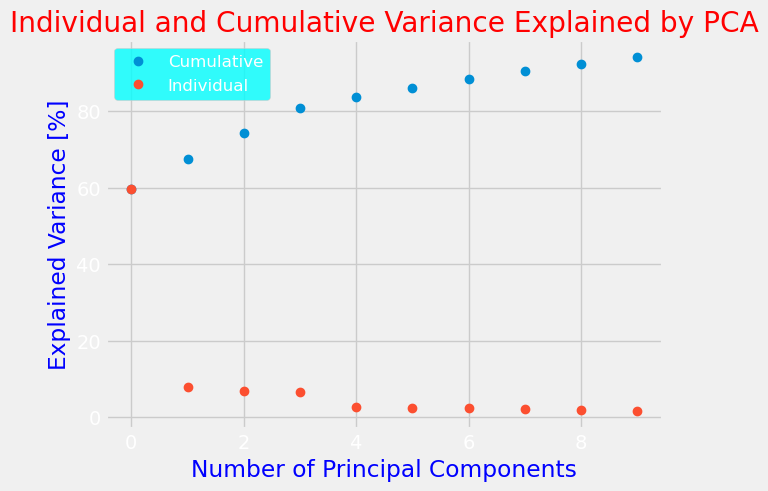

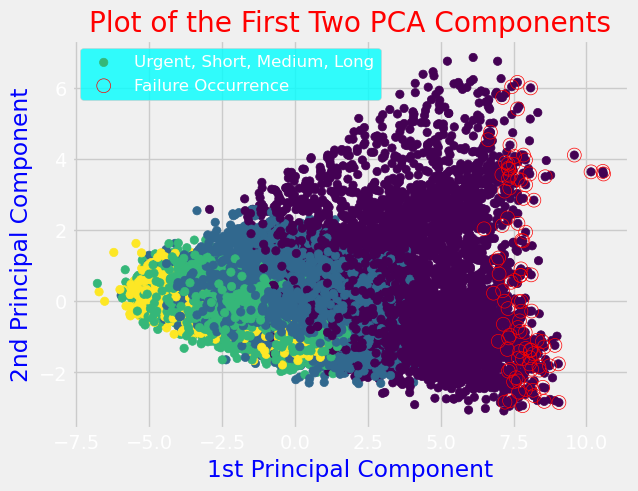

In [64]:
from sklearn.decomposition import PCA

# Extracting the selected columns for PCA
selected_data = df_train[feats]

# Performing PCA
pca = PCA()
wcoeff = pca.fit_transform(selected_data)

# Determine the number of principal components
num_components = wcoeff.shape[1]

# Creating a DataFrame with dynamic column names
score = pd.DataFrame(wcoeff, columns=[f'Principal Component {i + 1}' for i in range(num_components)])

latent = pca.explained_variance_

# Plotting the individual and cumulative variance explained by PCA components
fig, ax = plt.subplots()
ax.plot(np.cumsum(latent[:10]) / np.sum(latent) * 100, 'o')
ax.plot(latent[:10] / np.sum(latent) * 100, 'o')
ax.set(xlabel='Number of Principal Components', ylabel='Explained Variance [%]',
       title='Individual and Cumulative Variance Explained by PCA')
ax.xaxis.label.set_color('blue')  # Color of xlabel
ax.yaxis.label.set_color('blue')  # Color of ylabel
ax.title.set_color('red')  # Color of title
ax.legend(['Cumulative', 'Individual'], loc='upper left', fontsize=12, facecolor=[0, 1, 1])
plt.show()

# Convert categorical labels to numerical values
label_mapping = {'Urgent': 0, 'Short': 1, 'Medium': 2, 'Long': 3, 'Failure Occurrence': 4}
df_train['Label'] = df_train['Label'].map(label_mapping)

# Creating a plot of the first two components
fig, ax = plt.subplots()
s1 = ax.scatter(score.iloc[:, 0], score.iloc[:, 1], c=df_train['Label'],
                label='Urgent, Short, Medium, Long')
idx = df_train.groupby(["UnitNumber"])["Cycle"].transform(max) == df_train['Cycle']
s2 = ax.scatter(score[idx].iloc[:, 0], score[idx].iloc[:, 1], marker='o', s=100,
                label="Failure Occurrence", facecolors='none', edgecolors='r')
ax.legend(loc='upper left', fontsize=12, facecolor=[0, 1, 1])
ax.set(xlabel='1st Principal Component', ylabel='2nd Principal Component',
       title='Plot of the First Two PCA Components')
ax.xaxis.label.set_color('blue')  # Color of xlabel
ax.yaxis.label.set_color('blue')  # Color of ylabel
ax.title.set_color('red')  # Color of title
plt.show()

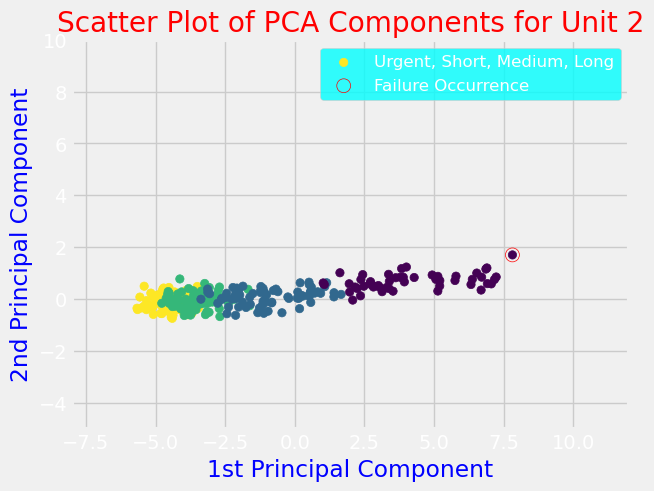

In [65]:
# Visualize a Trajectory of Unit-2 in 1st and 2nd Principal Components Plane
idx_unit = df_train['UnitNumber'] == 2
idx_failure = idx_unit & (df_train.groupby(["UnitNumber"])["Cycle"].transform(max) == df_train['Cycle'])

# Creating a scatter plot
fig, ax = plt.subplots()
s1 = ax.scatter(score.loc[idx_unit, "Principal Component 1"], score.loc[idx_unit, "Principal Component 2"],
                c=df_train.loc[idx_unit, 'Label'], label='Urgent, Short, Medium, Long')
ax.scatter(score.loc[idx_failure, "Principal Component 1"], score.loc[idx_failure, "Principal Component 2"],
           marker='o', s=100, label="Failure Occurrence", facecolors='none', edgecolors='r')
ax.legend(loc='upper right', fontsize=12, facecolor=[0, 1, 1])
ax.set(xlabel='1st Principal Component', ylabel='2nd Principal Component',
       title='Scatter Plot of PCA Components for Unit 2')
ax.xaxis.label.set_color('blue')  # Color of xlabel
ax.yaxis.label.set_color('blue')  # Color of ylabel
ax.title.set_color('red')  # Color of title
ax.set_xlim([-8, 12])
ax.set_ylim([-5, 10])
plt.show()

In [ ]:
#create function to calculate Mahalanobis distance
def mahalanobis_distance(x, mean, cov_inv):
    """
    Calculate Mahalanobis distance for a point or array of points.

    Parameters:
    - x: Data point or array of points (shape: (n_samples, n_features))
    - mean: Mean vector of the distribution
    - cov_inv: Inverse of the covariance matrix

    Returns:
    - distances: Mahalanobis distances for each point
    """
    diff = x - mean
    distances = np.sqrt(np.sum(diff @ cov_inv * diff, axis=1))
    return distances


# Calculate the thresholds of Mahalanobis distance to detect 5%, 1%, and 0.1% outliers
idx = (df_train['Label'] == 3)
th = [0.001, 0.01, 0.05]
C = [None] * 3

# Assuming 'mean' is the mean vector and 'cov_inv' is the inverse of the covariance matrix
mean = np.mean(score[idx.values, :2], axis=0)
cov_inv = np.linalg.inv(np.cov(score[idx.values, :2].T))

# Calculate the Mahalanobis distance for each data
d = 0.1
x1Grid, x2Grid = np.meshgrid(np.arange(-8, 8.1, d), np.arange(-8, 8.1, d))
aGrid = mahalanobis_distance(np.column_stack((x1Grid.ravel(), x2Grid.ravel())), mean, cov_inv)
aGrid = aGrid.reshape(x1Grid.shape)

# Calculate the thresholds to detect 5%, 1%, and 0.1% outliers on the first two components
from scipy.stats import chi2
for kk in range(3):
    lev = chi2.ppf(1 - th[kk], 2)
    contours = plt.contour(x1Grid, x2Grid, aGrid, levels=[lev, lev], colors='k')
    C[kk] = contours.collections[0]

# Set the color for 5%, 1%, and 0.1% outlier regions
col5per = [0.75, 0.95, 1]
col1per = [0.75, 1, 0.75]
col01per = [1, 1, 0.75]
colAnomaly = [1, 0.85, 0.85]

# Plot the result
plt.figure()
for kk in range(3):
    plt.contour(C[kk], color=col01per if kk == 0 else (col1per if kk == 1 else col5per))

s1 = plt.scatter(score[:, 0], score[:, 1], c=df_train['Label'], label='Urgent, Short, Medium, Long')
idx = (df_train.groupby(["UnitNumber"])["Cycle"].transform(max) == df_train['Cycle'])
s2 = plt.scatter(score[idx.values, 0], score[idx.values, 1], c='r', marker='p', s=100, facecolors='w', label='Failure Occurrence')
plt.legend(handles=[s1, s2], loc='upper left', fontsize=12, facecolor=[0, 1, 1])
plt.gca().set_facecolor(colAnomaly)
plt.gca().set_box(True)
plt.gca().set_axis_on()
plt.xlabel('1st Principal Component', fontsize=12)
plt.ylabel('2nd Principal Component', fontsize=12)
plt.title('Training Data and Calculated Outlier Detection Threshold\n'
          'Blue: Normal, Green: 5% outlier, Yellow: 1% outlier, Red: 0.1% outlier', fontsize=12)
plt.xaxis.label.set_color('blue')  # Color of xlabel
plt.yaxis.label.set_color('blue')  # Color of ylabel
plt.title.set_color('red')  # Color of title
plt.show()